For this project, I was looking at registration options for RelA 250 at BYU Fall 2020. I frequently use Rate My Professor as an online resource to help in picking good professors for a class. BYU has many different professors for each subject, so sorting through them to find the best can be fairly tedious. I scraped the data from the three quantitative rating categories (Overall rating, Level of Difficulty, and Percentage would take again) from Rate My Professor to find an appropriate weighted average and compare professors to make the best choice.

This approach ranks the quality of professors relative to each other, rather than absolute magnitude of the vectors.

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("RELA 250 Professors.xlsx", index_col="Professor")

In [ ]:
display(df)
indexes_professors = df.index #for later use
#print(indexes_professors)

,Overall,Difficulty,Retake
Professor,,,
Whitchurch,3.5,3.5,0.25
Hilton,4.5,2.7,0.81
Ellison,4.2,3.2,0.82
"Combs, Jason",4.1,2.8,0.80
"Davis, Ryan",4.1,2.6,0.84
"Wilcox, Bradley",3.8,3.1,0.58
"Kerry, Hull",3.4,3.2,0.62
"Grey, Matthew",4.7,2.3,0.90
"Pierce, George",3.9,2.3,0.83


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(data=data_scaled, columns=['Overall', 'Difficulty', 'Retake Rate'], index = indexes_professors)
display(df_scaled)

,Overall,Difficulty,Retake Rate
Professor,,,
Whitchurch,0.076923,1.000000,0.000000
Hilton,0.846154,0.333333,0.861538
Ellison,0.615385,0.750000,0.876923
"Combs, Jason",0.538462,0.416667,0.846154
"Davis, Ryan",0.538462,0.250000,0.907692
"Wilcox, Bradley",0.307692,0.666667,0.507692
"Kerry, Hull",0.000000,0.750000,0.569231
"Grey, Matthew",1.000000,0.000000,1.000000
"Pierce, George",0.384615,0.000000,0.892308


In [ ]:
#invert Difficulty so it doesn't give inaccurate weight in final average
df_scaled['Difficulty'] = 1.0 - df_scaled['Difficulty']

#display(df_scaled)

for row in df_scaled.index:
  for col in df_scaled.columns:
    if abs(df_scaled.loc[row, col]) < 0.0000000001:
      df_scaled.loc[row, col] = 0


display(df_scaled)
#df_scaled.describe()
#df_scaled.info()

,Overall,Difficulty,Retake Rate
Professor,,,
Whitchurch,0.076923,0.000000,0.000000
Hilton,0.846154,0.666667,0.861538
Ellison,0.615385,0.250000,0.876923
"Combs, Jason",0.538462,0.583333,0.846154
"Davis, Ryan",0.538462,0.750000,0.907692
"Wilcox, Bradley",0.307692,0.333333,0.507692
"Kerry, Hull",0.000000,0.250000,0.569231
"Grey, Matthew",1.000000,1.000000,1.000000
"Pierce, George",0.384615,1.000000,0.892308


In [ ]:
#Scale the categories for a final weighted average. Scales are broken down as follows (percentage):
# Overall - 30%
# Difficulty - 50%
# Retake Rate - 20%

df_scaled['Overall'] *= 0.3
df_scaled['Difficulty'] *= 0.5
df_scaled['Retake Rate'] *= 0.2

display(df_scaled)

,Overall,Difficulty,Retake Rate
Professor,,,
Whitchurch,0.023077,0.000000,0.000000
Hilton,0.253846,0.333333,0.172308
Ellison,0.184615,0.125000,0.175385
"Combs, Jason",0.161538,0.291667,0.169231
"Davis, Ryan",0.161538,0.375000,0.181538
"Wilcox, Bradley",0.092308,0.166667,0.101538
"Kerry, Hull",0.000000,0.125000,0.113846
"Grey, Matthew",0.300000,0.500000,0.200000
"Pierce, George",0.115385,0.500000,0.178462


In [ ]:
#Computes the weighted average and sorts the dataframe by highest weighted average
#to see the best professor.

df_scaled['Weighted Average'] = df_scaled.mean(axis=1)
df_scaled.sort_values(by=['Weighted Average'], inplace=True, ascending=False)
display(df_scaled)

,Overall,Difficulty,Retake Rate,Weighted Average
Professor,,,,
"Grey, Matthew",0.300000,0.500000,0.200000,0.333333
"Pierce, George",0.115385,0.500000,0.178462,0.264615
Hilton,0.253846,0.333333,0.172308,0.253162
"Davis, Ryan",0.161538,0.375000,0.181538,0.239359
"Combs, Jason",0.161538,0.291667,0.169231,0.207479
Ellison,0.184615,0.125000,0.175385,0.161667
"Wilcox, Bradley",0.092308,0.166667,0.101538,0.120171
"Kerry, Hull",0.000000,0.125000,0.113846,0.079615
Whitchurch,0.023077,0.000000,0.000000,0.007692


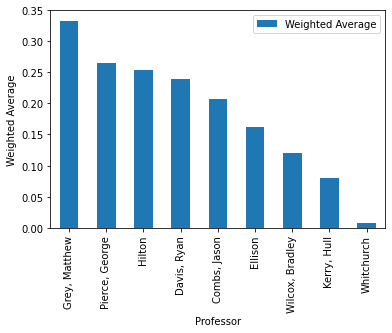

In [ ]:
#visualize

_ = df_scaled.plot(kind='bar', y='Weighted Average')
_ = plt.ylabel('Weighted Average')
plt.show()